# Test of hypothesis for marketing promotion team

## Introduction

Progressing on the Analysis for the marketing team, We will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, we will communicate the results to stakeholders. These experiences will help make more confident recommendations in the next meeting.

In the dataset, each row corresponds to an independent marketing promotion, where business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable us to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

In [1]:
# Import relevant libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load the dataset
data= pd.read_csv(r'C:\Users\user\Desktop\Course 5\marketing_sales_data.csv')

#Inspect the dataset
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

## Data exploration


Use a boxplot to determine how `sales` vary based on `TV` promotion budget category

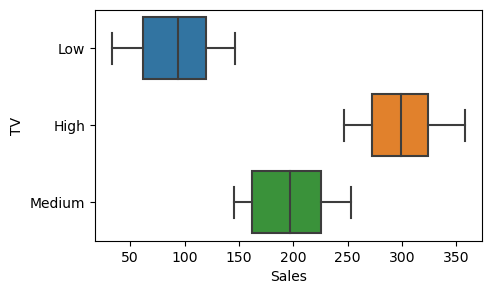

In [4]:
plt.figure(figsize= (5,3))
sns.boxplot(x= 'Sales', y= 'TV', data= data );

### Quick Insight
There is considerable variation in `Sales` across the `TV` groups. The significance of these differences can be tested with a one-way ANOVA.

Now, we will use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

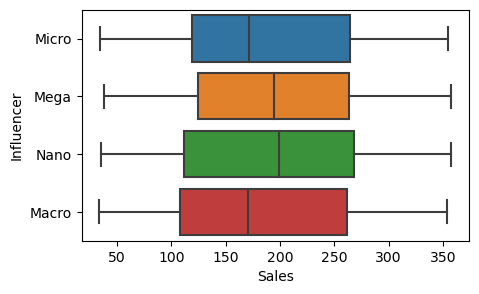

In [5]:
plt.figure(figsize= (5,3))
sns.boxplot(data= data, x='Sales', y= 'Influencer');

### Quick Insight
There is some variation in `Sales` across the `Influencer` groups, but it may not be significant.

In [6]:
# Dropping null values becasue there are not many rows
data= data.dropna(axis= 0)
data.shape

(572, 5)

## Model building

In [7]:
# Define the OLS formula.
ols_formula= 'Sales  ~ C(TV)'

# Create an OLS model.
OLS= ols(formula= ols_formula, data= data)

# Fit the model.
model= OLS.fit()

# Save the results summary.
model_result =model.summary()

# Display the model results.
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Fri, 04 Aug 2023   Prob (F-statistic):          1.38e-253
Time:                        20:36:47   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Quick insight

* `TV` was selected as the preceding analysis showed a strong relationship between the `TV` promotion budget and the average `Sales`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the analysis.

## Check model assumpptions

`Firstly, because the model does not have any contonous Independent variable, the normality assumption is not required.`

`Also, because the independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.`

Next, verify that the normality assumption is not violated

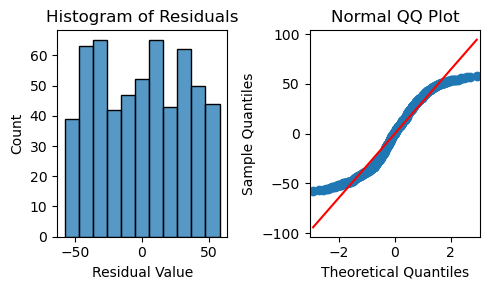

In [9]:
# Calculate the residuals.
residuals= model.resid

# Create a 1x2 plot figure
fig, axes= plt.subplots(1,2, figsize= (5,3 ))
                       
# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")
                       
# Create a QQ plot of the residuals.
sm.qqplot(residuals, line='s', ax=axes[1])
                       
# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

#### Quick Insight
There is reasonable concern that the normality assumption is not met when `TV` is used as the independent variable predicting `Sales`. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior. 



**Check if the constant variance (homoscedascity) assumption is met.**

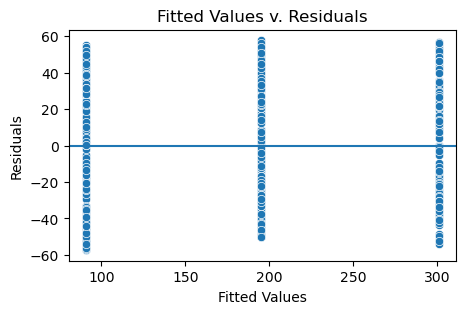

In [10]:
plt.figure(figsize= (5,3))
# Create a scatter plot with the fitted values from the model and the residuals.
fig= sns.scatterplot(x= model.fittedvalues, y= model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline()

plt.show()

**Note:**

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.

## Results and Evaluation

In [14]:
#Display the result of the model 
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Fri, 04 Aug 2023   Prob (F-statistic):          1.38e-253
Time:                        20:36:47   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Quick Insight
Using `TV` as the independent variable results in a linear regression model with $R^{2} = 0.874$. In other words, the model explains $87.4\%$ of the variation in `Sales`. This makes the model an effective predictor of `Sales`. 

The default `TV` category for the model is `High`, because there are coefficients for the other two `TV` categories, `Medium` and `Low`. According to the model, `Sales` with a `Medium` or `Low` `TV` category are lower on average than `Sales` with a `High` `TV` category. For example, the model predicts that a `Low` `TV` promotion would be 209.8691 (in millions of dollars) lower in `Sales` on average than a `High` `TV` promotion.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. For instance, there is a $95\%$ chance the interval $[-215.353,-202.274]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

### Here are ways to increase accuracy of model:
Given how accurate `TV` was as a predictor, the model could be improved with a more granular view of the `TV` promotions, such as additional categories or the actual `TV` promotion budgets. Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy. 

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [12]:
# Create a one-way ANOVA table for the fit data
sm.stats.anova_lm(model ,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.016116e+06,2.008058e+06,1917.749265,1.383230e-253
Residual,569.0,5.957948e+05,1.047091e+03,NaN,NaN


#### Null hypothesis: 
The null hypothesis is that there is no difference in `Sales` based on the `TV` promotion budget.

#### Alternative hypothesis:
The alternative hypothesis is that there is a difference in `Sales` based on the `TV` promotion budget.

### Conclusion on ANOVA test
The F-test statistic is 1917.75 and the p-value is $1.38 * 10^{-253}$ (i.e., very small). Because the p-value is less than 0.05, we would reject the null hypothesis that there is no difference in `Sales` based on the `TV` promotion budget.


The results of the one-way ANOVA test indicate that we can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in `Sales` among `TV` groups.

### Perform an ANOVA post hoc test

If we have significant results from the one-way ANOVA test, we can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [13]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway= pairwise_tukeyhsd(endog= data['Sales'], groups= data['TV'])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-209.8691,0.0,-217.8438,-201.8944,True
High,Medium,-105.4952,0.0,-113.4346,-97.5557,True
Low,Medium,104.3739,0.0,96.8261,111.9218,True


### Quick Insight 
The first row, which compares the `High` and `Low` `TV` groups, indicates that you can reject the null hypothesis that there is no significant difference between the `Sales` of these two groups.

We can also reject the null hypotheses for the two other pairwise comparisons that compare `High` to `Medium` and `Low` to `Medium`.


A post hoc test was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests. 

**The results were that `Sales` is not the same between any pair of `TV` groups.**


## **Conclusion**



High TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.


Specifically, following are estimates for the average difference between each pair of TV promotions:

* Estimated average difference between High and Low TV promotions: \\$209.87 million (with 95% confidence that the exact value for this average difference is between 201.89 and 217.84 million dollars).
* Estimated average difference between High and Medium TV promotions: \\$105.50 million (with 95% confidence that the exact value for this average difference is between 97.56 and 113.43 million dollars).
* Estimated average difference between Medium and Low TV promotions: \\$104.37 million (with 95\% confidence that the exact value for this average difference is between 96.83 and 111.92 million dollars).

The linear regression model estimating `Sales` from `TV` had an R-squared of $0.871, making it a fairly accurate estimator. The model showed a statistically significant relationship between the `TV` promotion budget and `Sales`. The model estimated the following relationships:

* Using a high TV promotion budget instead of a medium TV promotion budget increased sales by 105.4952 million dollars (95% CI - 98.859, 112.131 million dollars).

* Using a high TV promotion budget instead of a low TV promotion budget increased sales by 209.8691 million dollars (95% CI - 203.203 million, 216.535 million dollars).

The results of the one-way ANOVA test indicate that the null hypothesis that there is no difference in Sales based on the TV promotion budget can be rejected. Through the ANOVA post hoc test, a significant difference between all pairs of TV promotions was found.

The difference in the distribution of sales across TV promotions was determined significant by both a one-way ANOVA test and a Tukey’s HSD test. 